In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path, PurePath

if Path('../data').exists():
    data_directory = PurePath("../data")
    print(data_directory)
    
if Path('../visuals').exists():
    viz_directory = PurePath("../visuals")
    print(viz_directory)
    
if Path('../src').exists():
    src_directory = PurePath("../src")
    print(src_directory)


..\data
..\visuals
..\src


### Unfortunatly we cannot run merge script effortlessly from ipython
This is mostly because we have a prompt, instead do the following:
From the root of the directory or inside src:

`python merge_csv.py` or `python src/merge_csv.py`

This will create a merged result of different runs you have accumulated.


In [2]:
# %run -n  "../src/merge_csv.py"

In [73]:
# bound functions
def linear(x, c=1e-6):
    return x*c

def nlogn(x, c=1e-6):
    return (np.log2(x)*x)*c
    
def quadratic(x, c=1e-6):
    return [(i**2)*c for i in x]

In [3]:
checkout = pd.read_csv(f"{data_directory}/merged_results.csv")
checkout["NumberOfElements"] = 2**checkout["2^N"]

In [4]:
checkout["Time/N (us)"] = ((checkout['Time']/checkout['NumberOfElements'])*1e6).to_numpy(dtype='float32')
sorting_algos = checkout.Algorithm.unique()

In [5]:
sorting_algos

array(['bubble_sort', 'insertion_sort', 'python_sort', 'numpy_sort',
       'iterative_quicksort_shufffle', 'mergesort', 'mergesort_combined',
       'iterative_quicksort'], dtype=object)

In [130]:

plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 4
plt.rcParams["legend.markerscale"] = 0.6
plt.rcParams['legend.title_fontsize'] = 6
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4


In [140]:
height=50
width=84
IMAGE_SIZE = (width/25.4, height/25.4)

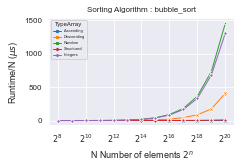

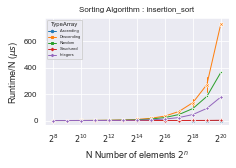

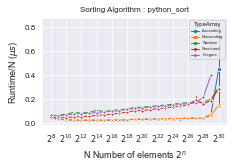

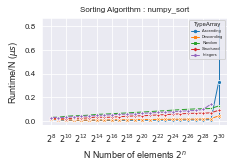

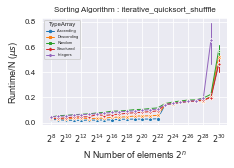

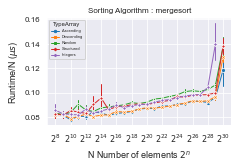

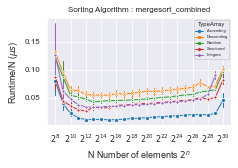

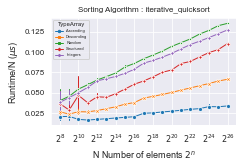

In [141]:
def plot_runtime_per_n(df, algo, start=7, lowerbound=None, upperbound=None, image_size=(10,10), tickstep=1):
    sns.set_style("darkgrid")
    plt.figure(figsize=image_size)
    time_per_n = sns.lineplot(
        data=checkout[(checkout.Algorithm == algo) & (checkout["2^N"] > 7)], 
        x="2^N", y="Time/N (us)", hue="TypeArray", style="TypeArray", markers=True, dashes=False, err_style="bars",
    )
    
    range_gen = range(8, max(checkout[checkout.Algorithm == algo]['2^N'] + 1), tickstep)
    
    time_per_n.set(yscale="linear", xscale="linear")
    time_per_n.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
    time_per_n.set(xticks=[int(i) for i in range_gen])
    time_per_n.set(xticklabels=[r"$2^{" + str(int(i)) + r"}$" for i in range_gen])
    time_per_n.set(title=f"Sorting Algorithm : {algo}")
    
    plt.savefig(f"{viz_directory}/time_per_n{algo}.pdf", bbox_inches='tight', transparent=True)
    plt.show()

for algo in sorting_algos:
    plot_runtime_per_n(df=checkout, algo=algo, start=7, image_size=IMAGE_SIZE, tickstep=2)
    



In [142]:
def plot_runtime(df, algo, start=7, lowerbound=None, upperbound=None, c1=1e-6, c2=1e-6, image_size=(10,10), tickstep=1):
    sns.set_style("darkgrid")
    plt.figure(figsize=image_size)
    runtime = sns.lineplot(
        data=checkout[(checkout.Algorithm == algo) & (checkout["2^N"] > start)], 
        x="2^N", y="Time", hue="TypeArray", style="TypeArray", markers=True, dashes=False, err_style="bars",
    )
    
    range_gen = range(8, max(checkout[checkout.Algorithm == algo]['2^N'] + 1), tickstep)
    
    dx = np.asarray([2**i for i in range_gen], dtype='int64')
                
    if lowerbound:
        runtime.plot(range_gen, lowerbound(dx, c1), '-k', label=f'$\Omega$ = {lowerbound.__name__}, c1=' + format(c1, "10.2E"))
        plt.legend()
    
    if upperbound:
        runtime.plot(range_gen, upperbound(dx, c2), '--k', label=f'$O$ = {upperbound.__name__}, c2='+format(c2, "10.2E"))
        plt.legend()
    
    runtime.set(yscale="log")
    runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime ($s$)")
    runtime.set(xticks=[int(i) for i in range_gen])
    runtime.set(xticklabels=[r"$2^{" + str(int(i)) + r"}$" for i in range_gen])
    runtime.set(title=f"Sorting Algorithm : {algo}")
    
    plt.savefig(f"{viz_directory}/runtime{algo}.pdf", bbox_inches='tight', transparent=True)
    plt.show()
    
height = 60
IMAGE_SIZE = (width/25.4, height/25.4)

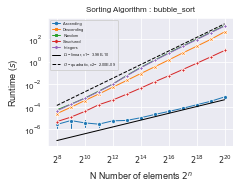

In [143]:
plot_runtime(checkout, "bubble_sort", lowerbound=linear, c1=10**(-9.4), upperbound=quadratic, c2=10**(-8.7), tickstep=2, image_size=IMAGE_SIZE)

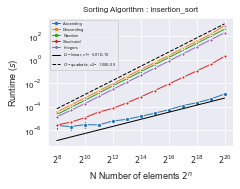

In [144]:
plot_runtime(checkout, "insertion_sort", lowerbound=linear, c1=10**(-9.3), upperbound=quadratic, c2=10**(-9), tickstep=2, image_size=IMAGE_SIZE)

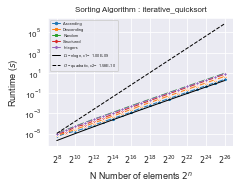

In [145]:
plot_runtime(checkout, "iterative_quicksort", lowerbound=nlogn, c1=10**(-9), upperbound=quadratic, c2=10**(-9.8), tickstep=2, image_size=IMAGE_SIZE)

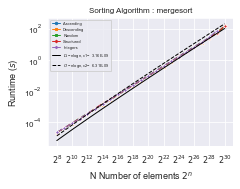

In [146]:
plot_runtime(checkout, "mergesort", lowerbound=nlogn, c1=10**(-8.5), upperbound=nlogn, c2=10**(-8.2), tickstep=2, image_size=IMAGE_SIZE)

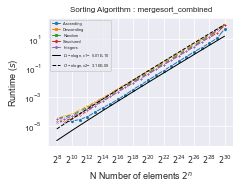

In [147]:
plot_runtime(checkout, "mergesort_combined", lowerbound=nlogn, c1=10**(-9.3), upperbound=nlogn, c2=10**(-8.5), tickstep=2, image_size=IMAGE_SIZE)

In [10]:
checkout.sample(5)

,Unnamed: 0,Unnamed: 0.1,Algorithm,2^N,TypeArray,Time,NumberOfElements,Time/N (us)
18068,18068,2093,mergesort,17,Structured,0.011342,131072,0.086532
17966,17966,1991,mergesort,16,Integers,0.006353,65536,0.096945
7602,7602,2402,python_sort,17,Ascending,0.002936,131072,0.022399
8431,8431,3231,mergesort,22,Random,0.398618,4194304,0.095038
14727,14727,2252,python_sort,19,Ascending,0.015107,524288,0.028815


# Comparisons
#### bubble_sort and insertion_sort

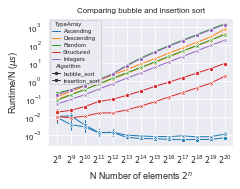

In [148]:
sns.set_style("darkgrid")
plt.figure(figsize=IMAGE_SIZE)
runtime = sns.lineplot(
    data=checkout[((checkout.Algorithm == "bubble_sort") | (checkout.Algorithm == "insertion_sort")) & 
                  (checkout["2^N"] > 7)], 
    x="2^N", y="Time/N (us)", hue="TypeArray", style="Algorithm", markers=True, dashes=False, err_style="bars",
)

runtime.set(yscale="log")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == "bubble_sort"]['2^N'] + 1))])
runtime.set(xticklabels=[
    r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == "bubble_sort"]['2^N'] + 1))
])
runtime.set(title=f"Comparing bubble and insertion sort")

plt.savefig(f"{viz_directory}/runtimebubble&insertion.pdf", bbox_inches='tight', transparent=True)
plt.show()

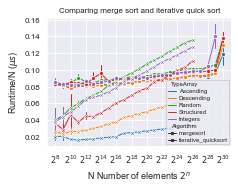

In [149]:
sns.set_style("darkgrid")
plt.figure(figsize=IMAGE_SIZE)
runtime = sns.lineplot(
    data=checkout[((checkout.Algorithm == "mergesort") | (checkout.Algorithm == "iterative_quicksort")) & 
                  (checkout["2^N"] > 7)], 
    x="2^N", y="Time/N (us)", hue="TypeArray", style="Algorithm", markers=True, dashes=False, err_style="bars",
)

runtime.set(yscale="linear")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1),2)])
runtime.set(xticklabels=[
    r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1), 2)
])
runtime.set(title=f"Comparing merge sort and iterative quick sort")

plt.savefig(f"{viz_directory}/runtime_per_n_merge&quick.pdf", bbox_inches='tight', transparent=True)
plt.show()

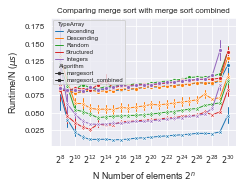

In [150]:
sns.set_style("darkgrid")
plt.figure(figsize=IMAGE_SIZE)
runtime = sns.lineplot(
    data=checkout[((checkout.Algorithm == "mergesort") | (checkout.Algorithm == "mergesort_combined")) & 
                  (checkout["2^N"] > 7)], 
    x="2^N", y="Time/N (us)", hue="TypeArray", style="Algorithm", markers=True, dashes=False, err_style="bars",
)

runtime.set(yscale="linear")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1), 2)])
runtime.set(xticklabels=[
    r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1), 2)
])
runtime.set(title=f"Comparing merge sort with merge sort combined")

plt.savefig(f"{viz_directory}/runtime_per_n_merge&combined.pdf", bbox_inches='tight', transparent=True)
plt.show()

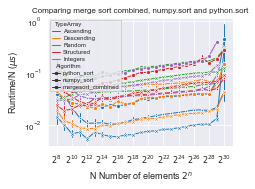

In [151]:
sns.set_style("darkgrid")
plt.figure(figsize=IMAGE_SIZE)
runtime = sns.lineplot(
    data=checkout[((checkout.Algorithm == "mergesort_combined") 
                   | (checkout.Algorithm == "numpy_sort")
                   | (checkout.Algorithm == "python_sort")) 
                  & 
                  (checkout["2^N"] > 7)], 
    x="2^N", y="Time/N (us)", hue="TypeArray", style="Algorithm", markers=True, dashes=False, err_style="bars",
)

runtime.set(yscale="log")
runtime.set(xlabel="N Number of elements $2^n$", ylabel="Runtime/N ($\mu s$)")
runtime.set(xticks=[int(i) for i in range(8, max(checkout[checkout.Algorithm == "mergesort_combined"]['2^N'] + 1), 2)])
runtime.set(xticklabels=[
    r"$2^{" + str(int(i)) + r"}$" for i in range(8, max(checkout[checkout.Algorithm == "mergesort"]['2^N'] + 1), 2)
])
runtime.set(title=f"Comparing merge sort combined, numpy.sort and python.sort")

plt.savefig(f"{viz_directory}/runtime_per_n_combined&np&py.pdf", bbox_inches='tight', transparent=True)
plt.show()